In [5]:
import math
import random
import numpy as np
import torch.utils.data as data
from PIL import Image
import torchvision.transforms as transforms

In [6]:
import numpy as np


hue_angles = np.array([0, 45, 90, 135, 180, 225, 270, 315, 360])

hue_radians = np.radians(hue_angles)

Hue_sin = np.sin(hue_radians)
Hue_cos = np.cos(hue_radians)


sin_cos_list = []

for angle, sin_val, cos_val in zip(hue_angles, Hue_sin, Hue_cos):
    sin_cos_list.append(zip(Hue_sin,Hue_cos))
    
    print(f"Angle: {angle}°, Hue_sin: {sin_val}, Hue_cos: {cos_val}")


Angle: 0°, Hue_sin: 0.0, Hue_cos: 1.0
Angle: 45°, Hue_sin: 0.7071067811865476, Hue_cos: 0.7071067811865476
Angle: 90°, Hue_sin: 1.0, Hue_cos: 6.123233995736766e-17
Angle: 135°, Hue_sin: 0.7071067811865476, Hue_cos: -0.7071067811865475
Angle: 180°, Hue_sin: 1.2246467991473532e-16, Hue_cos: -1.0
Angle: 225°, Hue_sin: -0.7071067811865475, Hue_cos: -0.7071067811865477
Angle: 270°, Hue_sin: -1.0, Hue_cos: -1.8369701987210297e-16
Angle: 315°, Hue_sin: -0.7071067811865477, Hue_cos: 0.7071067811865474
Angle: 360°, Hue_sin: -2.4492935982947064e-16, Hue_cos: 1.0


In [7]:

hue_angles = np.array([0., 45., 90., 135., 180., 225., 270., 315., 360.])

hue_radians = np.radians(hue_angles)

sin_list = []
cos_list = []
for hue in hue_radians:
    hue_sin = np.sin(hue)
    hue_cos = np.cos(hue)
    sin_list.append(hue_sin)
    cos_list.append(hue_cos)

print(sin_list)
print(cos_list)

[0.0, 0.7071067811865476, 1.0, 0.7071067811865476, 1.2246467991473532e-16, -0.7071067811865475, -1.0, -0.7071067811865477, -2.4492935982947064e-16]
[1.0, 0.7071067811865476, 6.123233995736766e-17, -0.7071067811865475, -1.0, -0.7071067811865477, -1.8369701987210297e-16, 0.7071067811865474, 1.0]


In [8]:
# 使用atan2函数计算对应的Hue角度
hue_angles_calculated = np.degrees(np.arctan2(sin_list, cos_list))

# 由于atan2返回的角度范围是[-180, 180]，需要将负值转换为正值，以匹配[0, 360]的范围
hue_angles_calculated = np.mod(hue_angles_calculated, 360)

# 打印计算后的Hue角度
hue_angles_calculated


array([  0.,  45.,  90., 135., 180., 225., 270., 315., 360.])

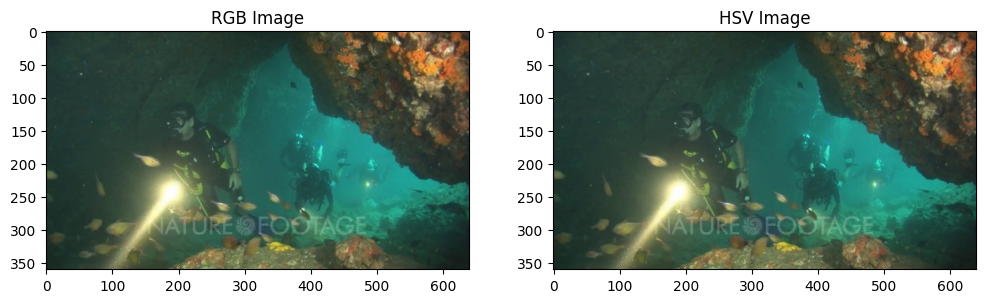

In [9]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# 替换以下路径为你的图片文件路径
image_path = "datasets\\train\\5016.jpg"  # 示例图片路径

# 读取图片并转换成RGB
image_rgb = Image.open(image_path).convert("RGB")

# 将RGB图片转换成HSV
image_hsv = image_rgb.convert("HSV")

# 使用matplotlib展示图片
plt.figure(figsize=(12, 6))

# 展示RGB图片
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('RGB Image')

# 展示HSV图片
# 注意: 直接显示HSV图像可能不会产生预期的视觉效果，
# 因为matplotlib默认认为图像是在RGB空间。
plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title('HSV Image')

plt.show()


In [10]:
hsv_array = np.array(image_hsv)

# 打印HSV图像的每个通道的数值示例
print("Hue Channel Values:\n", hsv_array[:, :, 0])
print("Saturation Channel Values:\n", hsv_array[:, :, 1])
print("Value Channel Values:\n", hsv_array[:, :, 2])


Hue Channel Values:
 [[117 117 123 ...  29  29  35]
 [117 117 123 ...  26  28  28]
 [117 117 123 ...  24  24  22]
 ...
 [104 104 104 ...  99  99  99]
 [104 104 104 ...  99  99  99]
 [104 104 104 ...  99  99  99]]
Saturation Channel Values:
 [[113 113 110 ...  97  87  76]
 [113 113 110 ...  89  79  75]
 [113 113 110 ...  80  74  63]
 ...
 [ 80  80  78 ...  51  51  51]
 [ 80  78  78 ...  52  54  54]
 [ 80  78  78 ...  54  54  56]]
Value Channel Values:
 [[47 47 46 ... 60 58 60]
 [47 47 46 ... 60 58 61]
 [47 47 46 ... 60 58 60]
 ...
 [41 41 42 ... 30 30 30]
 [41 42 42 ... 29 28 28]
 [41 42 42 ... 28 28 27]]


In [11]:
hsv_array[:, :, 0]

array([[117, 117, 123, ...,  29,  29,  35],
       [117, 117, 123, ...,  26,  28,  28],
       [117, 117, 123, ...,  24,  24,  22],
       ...,
       [104, 104, 104, ...,  99,  99,  99],
       [104, 104, 104, ...,  99,  99,  99],
       [104, 104, 104, ...,  99,  99,  99]], dtype=uint8)

In [12]:
import numpy as np

# 假设 hsv_array 是您的 NumPy 数组
max_value = np.max(hsv_array[:, :, 0])
min_value = np.min(hsv_array[:, :, 0])

print("最大值:", max_value)
print("最小值:", min_value)


最大值: 250
最小值: 0


In [20]:
type(image_hsv)

PIL.Image.Image

In [31]:
image_hsv.mode

'HSV'

In [32]:
to_tensor = transforms.ToTensor()


In [33]:

hsv_tensor = to_tensor(image_hsv)

In [34]:

hsv_tensor

tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.4431, 0.4431, 0.4431],
         [0.5725, 0.5725, 0.5725,  ..., 0.4431, 0.4431, 0.4431],
         [0.5725, 0.5725, 0.5725,  ..., 0.4431, 0.4431, 0.4431],
         ...,
         [0.4980, 0.4980, 0.4980,  ..., 0.3490, 0.3490, 0.3490],
         [0.4980, 0.4980, 0.4980,  ..., 0.3490, 0.3490, 0.3490],
         [0.4980, 0.4980, 0.4980,  ..., 0.3490, 0.3490, 0.3490]],

        [[0.3882, 0.3882, 0.3882,  ..., 0.3608, 0.3608, 0.3608],
         [0.3882, 0.3882, 0.3882,  ..., 0.3608, 0.3608, 0.3608],
         [0.3882, 0.3882, 0.3882,  ..., 0.3608, 0.3608, 0.3608],
         ...,
         [0.4000, 0.4000, 0.4000,  ..., 0.4549, 0.4549, 0.4549],
         [0.4000, 0.4000, 0.4000,  ..., 0.4549, 0.4549, 0.4549],
         [0.4000, 0.4000, 0.4000,  ..., 0.4549, 0.4549, 0.4431]],

        [[0.0902, 0.0902, 0.0902,  ..., 0.1294, 0.1294, 0.1294],
         [0.0902, 0.0902, 0.0902,  ..., 0.1294, 0.1294, 0.1294],
         [0.0902, 0.0902, 0.0902,  ..., 0.1294, 0.1294, 0.

In [21]:
type(image_rgb)

PIL.Image.Image

In [24]:
image_rgb.mode

'RGB'

In [9]:
hue_radians

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714, 6.28318531])

In [10]:
import numpy as np
test_sin = np.sin(90)
test_sin

0.8939966636005579

In [10]:
hue_radians

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714, 6.28318531])

In [9]:
for item in sin_cos_list:
    print(item)

In [ ]:
import math

Hue_sin = ...  # 你的Hue_sin值
Hue_cos = ...  # 你的Hue_cos值

# 计算弧度
angle_radians = math.atan2(Hue_sin, Hue_cos)

# 转换为度
angle_degrees = math.degrees(angle_radians)

# 调整范围
if angle_degrees < 0:
    angle_degrees += 360

print("原始色调角度（0°到360°范围内）:", angle_degrees)


In [40]:
from PIL import Image
import numpy as np

def create_hue_image(hue_value):
    # 创建一个具有相同 Hue 值，但饱和度和亮度都设置为最大的 HSV 图像
    hsv_image = np.zeros((100, 100, 3), dtype=np.uint8)
    hsv_image[:, :, 0] = hue_value
    hsv_image[:, :, 1] = 255  # 设置饱和度为最大
    hsv_image[:, :, 2] = 255  # 设置亮度为最大
    
    # 将 HSV 图像转换为 RGB 图像以便显示
    return Image.fromarray(hsv_image, 'HSV').convert('RGB')

# 创建 Hue 值为 0 的图像
hue_0_image = create_hue_image(0)

# 创建 Hue 值为 255 的图像
hue_255_image = create_hue_image(255)

# 显示图像
hue_0_image.show()
hue_255_image.show()


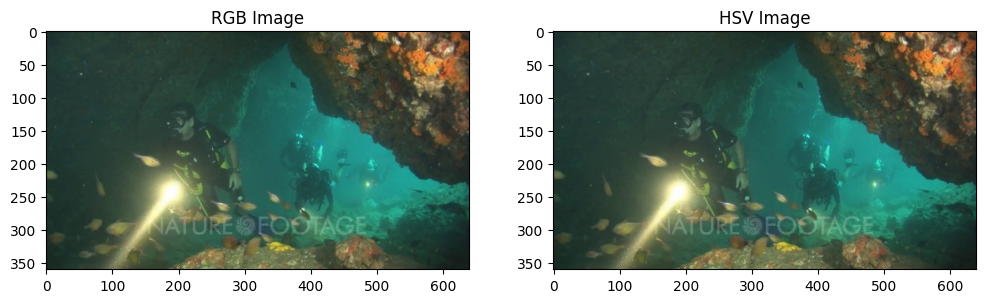

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# 替换以下路径为你的图片文件路径
image_path = "datasets\\train\\5016.jpg"  # 示例图片路径

# 读取图片并转换成RGB
image_rgb = Image.open(image_path).convert("RGB")

# 将RGB图片转换成HSV
image_hsv = image_rgb.convert("HSV")

# 使用matplotlib展示图片
plt.figure(figsize=(12, 6))

# 展示RGB图片
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('RGB Image')

# 展示HSV图片
# 注意: 直接显示HSV图像可能不会产生预期的视觉效果，
# 因为matplotlib默认认为图像是在RGB空间。
plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title('HSV Image')

plt.show()


In [56]:
# 1 convert to hsv
image_hsv = image_rgb.convert("HSV")

# hsv_array = np.array(image_hsv)

import torch
import numpy as np



def convert_hsv_to_four_channels(image_hsv):
    # 假设 image_hsv 是一个HSV模式的NumPy数组
    # 将 Hue 值从 [0, 255] 缩放到 [0, 360]
    image_hsv = np.array(image_hsv)
    hue_angles = image_hsv[:, :, 0] * (360 / 255)
    hue_radians = np.radians(hue_angles)

    # 计算 hue 的 sin 和 cos
    h_sin = np.sin(hue_radians)
    h_cos = np.cos(hue_radians)

    # 直接使用 S 和 V 通道的值，假设它们已经在 [0, 255] 范围内
    # 并且normalize到mean0.5,std0.5
    s = ((image_hsv[:, :, 1] / 255.0) - 0.5)/0.5
    v = ((image_hsv[:, :, 2] / 255.0) - 0.5)/0.5

    # 组合 h_sin, h_cos, s, v 为四个通道
    four_channels_array = np.stack((h_sin, h_cos, s, v), axis=-1)

    return four_channels_array


In [57]:
four_channels_array = convert_hsv_to_four_channels(image_hsv)
four_channels_array.shape

(360, 640, 4)

In [58]:
# 假设 four_channels_array 是通过前面步骤创建的四通道数组
# 下面展示如何分别访问和打印每个通道的值

# h_sin 通道
h_sin_channel = four_channels_array[:, :, 0]
print("h_sin Channel Values:\n", h_sin_channel)

# h_cos 通道
h_cos_channel = four_channels_array[:, :, 1]
print("\nh_cos Channel Values:\n", h_cos_channel)

# s 通道
s_channel = four_channels_array[:, :, 2]
print("\ns Channel Values:\n", s_channel)

# v 通道
v_channel = four_channels_array[:, :, 3]
print("\nv Channel Values:\n", v_channel)


h_sin Channel Values:
 [[0.25584278 0.25584278 0.11065268 ... 0.65528385 0.65528385 0.75940492]
 [0.25584278 0.25584278 0.11065268 ... 0.59770746 0.63647424 0.63647424]
 [0.25584278 0.25584278 0.11065268 ... 0.55748944 0.55748944 0.51591783]
 ...
 [0.54721955 0.54721955 0.54721955 ... 0.64592806 0.64592806 0.64592806]
 [0.54721955 0.54721955 0.54721955 ... 0.64592806 0.64592806 0.64592806]
 [0.54721955 0.54721955 0.54721955 ... 0.64592806 0.64592806 0.64592806]]

h_cos Channel Values:
 [[-0.9667184  -0.9667184  -0.99385914 ...  0.75538273  0.75538273
   0.6506183 ]
 [-0.9667184  -0.9667184  -0.99385914 ...  0.80171428  0.77129796
   0.77129796]
 [-0.9667184  -0.9667184  -0.99385914 ...  0.83018403  0.83018403
   0.85663808]
 ...
 [-0.83698911 -0.83698911 -0.83698911 ... -0.76339828 -0.76339828
  -0.76339828]
 [-0.83698911 -0.83698911 -0.83698911 ... -0.76339828 -0.76339828
  -0.76339828]
 [-0.83698911 -0.83698911 -0.83698911 ... -0.76339828 -0.76339828
  -0.76339828]]

s Channel Values

In [52]:
from torchvision import transforms
import numpy as np

# 创建一个transforms.Compose实例，其中包含了ToTensor和Normalize两个操作
transform1 = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize(mean=(0.5, 0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5, 0.5))
])

transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5, 0.5))
])

In [54]:
tensor1 = transform1(four_channels_array)
tensor1

tensor([[[ 0.2558,  0.2558,  0.1107,  ...,  0.6553,  0.6553,  0.7594],
         [ 0.2558,  0.2558,  0.1107,  ...,  0.5977,  0.6365,  0.6365],
         [ 0.2558,  0.2558,  0.1107,  ...,  0.5575,  0.5575,  0.5159],
         ...,
         [ 0.5472,  0.5472,  0.5472,  ...,  0.6459,  0.6459,  0.6459],
         [ 0.5472,  0.5472,  0.5472,  ...,  0.6459,  0.6459,  0.6459],
         [ 0.5472,  0.5472,  0.5472,  ...,  0.6459,  0.6459,  0.6459]],

        [[-0.9667, -0.9667, -0.9939,  ...,  0.7554,  0.7554,  0.6506],
         [-0.9667, -0.9667, -0.9939,  ...,  0.8017,  0.7713,  0.7713],
         [-0.9667, -0.9667, -0.9939,  ...,  0.8302,  0.8302,  0.8566],
         ...,
         [-0.8370, -0.8370, -0.8370,  ..., -0.7634, -0.7634, -0.7634],
         [-0.8370, -0.8370, -0.8370,  ..., -0.7634, -0.7634, -0.7634],
         [-0.8370, -0.8370, -0.8370,  ..., -0.7634, -0.7634, -0.7634]],

        [[ 0.4431,  0.4431,  0.4314,  ...,  0.3804,  0.3412,  0.2980],
         [ 0.4431,  0.4431,  0.4314,  ...,  0

In [55]:
tensor2 = transform2(four_channels_array)
tensor2

tensor([[[-0.4883, -0.4883, -0.7787,  ...,  0.3106,  0.3106,  0.5188],
         [-0.4883, -0.4883, -0.7787,  ...,  0.1954,  0.2729,  0.2729],
         [-0.4883, -0.4883, -0.7787,  ...,  0.1150,  0.1150,  0.0318],
         ...,
         [ 0.0944,  0.0944,  0.0944,  ...,  0.2919,  0.2919,  0.2919],
         [ 0.0944,  0.0944,  0.0944,  ...,  0.2919,  0.2919,  0.2919],
         [ 0.0944,  0.0944,  0.0944,  ...,  0.2919,  0.2919,  0.2919]],

        [[-2.9334, -2.9334, -2.9877,  ...,  0.5108,  0.5108,  0.3012],
         [-2.9334, -2.9334, -2.9877,  ...,  0.6034,  0.5426,  0.5426],
         [-2.9334, -2.9334, -2.9877,  ...,  0.6604,  0.6604,  0.7133],
         ...,
         [-2.6740, -2.6740, -2.6740,  ..., -2.5268, -2.5268, -2.5268],
         [-2.6740, -2.6740, -2.6740,  ..., -2.5268, -2.5268, -2.5268],
         [-2.6740, -2.6740, -2.6740,  ..., -2.5268, -2.5268, -2.5268]],

        [[-0.1137, -0.1137, -0.1373,  ..., -0.2392, -0.3176, -0.4039],
         [-0.1137, -0.1137, -0.1373,  ..., -0

In [41]:
# 访问第一个通道（H_sin）
h_sin_channel = tensor[0, :, :]
print("H_sin Channel Values:\n", h_sin_channel)

# 访问第二个通道（H_cos）
h_cos_channel = tensor[1, :, :]
print("H_cos Channel Values:\n", h_cos_channel)

# 访问第三个通道（S）
s_channel = tensor[2, :, :]
print("S Channel Values:\n", s_channel)

# 访问第四个通道（V）
v_channel = tensor[3, :, :]
print("V Channel Values:\n", v_channel)


H_sin Channel Values:
 tensor([[0.2558, 0.2558, 0.1107,  ..., 0.6553, 0.6553, 0.7594],
        [0.2558, 0.2558, 0.1107,  ..., 0.5977, 0.6365, 0.6365],
        [0.2558, 0.2558, 0.1107,  ..., 0.5575, 0.5575, 0.5159],
        ...,
        [0.5472, 0.5472, 0.5472,  ..., 0.6459, 0.6459, 0.6459],
        [0.5472, 0.5472, 0.5472,  ..., 0.6459, 0.6459, 0.6459],
        [0.5472, 0.5472, 0.5472,  ..., 0.6459, 0.6459, 0.6459]],
       dtype=torch.float64)
H_cos Channel Values:
 tensor([[-0.9667, -0.9667, -0.9939,  ...,  0.7554,  0.7554,  0.6506],
        [-0.9667, -0.9667, -0.9939,  ...,  0.8017,  0.7713,  0.7713],
        [-0.9667, -0.9667, -0.9939,  ...,  0.8302,  0.8302,  0.8566],
        ...,
        [-0.8370, -0.8370, -0.8370,  ..., -0.7634, -0.7634, -0.7634],
        [-0.8370, -0.8370, -0.8370,  ..., -0.7634, -0.7634, -0.7634],
        [-0.8370, -0.8370, -0.8370,  ..., -0.7634, -0.7634, -0.7634]],
       dtype=torch.float64)
S Channel Values:
 tensor([[113., 113., 110.,  ...,  97.,  87.,  7

In [ ]:
tensor = transform(four_channels_array)

In [ ]:



import torch
import numpy as np

def convert_4D_to_hsv(tensor_4D: torch.Tensor):
    # 确保输入是numpy数组
    tensor_np = tensor_4D.numpy()
    
    # 使用atan2函数计算对应的Hue角度
    h_sin = tensor_np[1]  # 假设第二个维度是sin(h)
    h_cos = tensor_np[0]  # 假设第一个维度是cos(h)
    hue_angles_calculated = np.degrees(np.arctan2(h_sin, h_cos))
    hue_angles = hue_angles_calculated + 180  # 转换为 [0, 360] 度范围
    
    # 将 Hue 角度缩放到 [0, 255]
    hue_scaled = np.clip(hue_angles * (255.0 / 360.0), 0, 255).astype(np.uint8)
    
    # 对 S 和 V 从 [-1, 1] 缩放到 [0, 1]，然后缩放到 [0, 255]
    s_scaled = np.clip(((tensor_np[2] + 1) / 2) * 255.0, 0, 255).astype(np.uint8)  # S 缩放
    v_scaled = np.clip(((tensor_np[3] + 1) / 2) * 255.0, 0, 255).astype(np.uint8)  # V 缩放
    
    # 组合 HSV 通道
    hsv_image = np.vstack((hue_scaled[np.newaxis, :], s_scaled[np.newaxis, :], v_scaled[np.newaxis, :]))
    
    return torch.from_numpy(hsv_image).float()  # 返回一个3维的向量

# 注意：此函数假设输入张量(tensor_4D)的形状为 (4, H, W)，并且数据类型为浮点数

    


#Network change on 1st layer input channel and last layer output channel

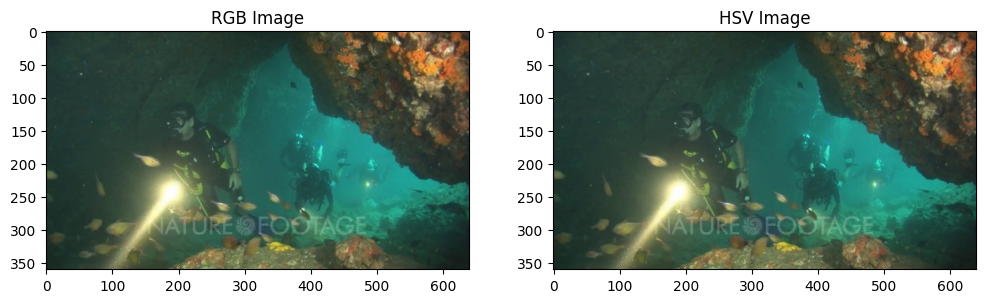

In [26]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# 替换以下路径为你的图片文件路径
image_path = "datasets\\train\\5016.jpg"  # 示例图片路径

# 读取图片并转换成RGB
image_rgb = Image.open(image_path).convert("RGB")

# 将RGB图片转换成HSV
image_hsv = image_rgb.convert("HSV")

# 使用matplotlib展示图片
plt.figure(figsize=(12, 6))

# 展示RGB图片
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('RGB Image')

# 展示HSV图片
# 注意: 直接显示HSV图像可能不会产生预期的视觉效果，
# 因为matplotlib默认认为图像是在RGB空间。
plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title('HSV Image')

plt.show()


In [27]:
hsv_array = np.array(image_hsv)


In [28]:
four_channels_array = convert_hsv_to_four_channels(hsv_array)

In [31]:
four_channels_array

array([[[ 2.55842778e-01, -9.66718404e-01,  1.13000000e+02,
          4.70000000e+01],
        [ 2.55842778e-01, -9.66718404e-01,  1.13000000e+02,
          4.70000000e+01],
        [ 1.10652682e-01, -9.93859137e-01,  1.10000000e+02,
          4.60000000e+01],
        ...,
        [ 6.55283850e-01,  7.55382735e-01,  9.70000000e+01,
          6.00000000e+01],
        [ 6.55283850e-01,  7.55382735e-01,  8.70000000e+01,
          5.80000000e+01],
        [ 7.59404917e-01,  6.50618300e-01,  7.60000000e+01,
          6.00000000e+01]],

       [[ 2.55842778e-01, -9.66718404e-01,  1.13000000e+02,
          4.70000000e+01],
        [ 2.55842778e-01, -9.66718404e-01,  1.13000000e+02,
          4.70000000e+01],
        [ 1.10652682e-01, -9.93859137e-01,  1.10000000e+02,
          4.60000000e+01],
        ...,
        [ 5.97707459e-01,  8.01714284e-01,  8.90000000e+01,
          6.00000000e+01],
        [ 6.36474236e-01,  7.71297962e-01,  7.90000000e+01,
          5.80000000e+01],
        [ 6.364

In [32]:
# 假设 four_channels_array 是通过前面步骤创建的四通道数组
# 下面展示如何分别访问和打印每个通道的值

# h_sin 通道
h_sin_channel = four_channels_array[:, :, 0]
print("h_sin Channel Values:\n", h_sin_channel)

# h_cos 通道
h_cos_channel = four_channels_array[:, :, 1]
print("\nh_cos Channel Values:\n", h_cos_channel)

# s 通道
s_channel = four_channels_array[:, :, 2]
print("\ns Channel Values:\n", s_channel)

# v 通道
v_channel = four_channels_array[:, :, 3]
print("\nv Channel Values:\n", v_channel)


h_sin Channel Values:
 [[0.25584278 0.25584278 0.11065268 ... 0.65528385 0.65528385 0.75940492]
 [0.25584278 0.25584278 0.11065268 ... 0.59770746 0.63647424 0.63647424]
 [0.25584278 0.25584278 0.11065268 ... 0.55748944 0.55748944 0.51591783]
 ...
 [0.54721955 0.54721955 0.54721955 ... 0.64592806 0.64592806 0.64592806]
 [0.54721955 0.54721955 0.54721955 ... 0.64592806 0.64592806 0.64592806]
 [0.54721955 0.54721955 0.54721955 ... 0.64592806 0.64592806 0.64592806]]

h_cos Channel Values:
 [[-0.9667184  -0.9667184  -0.99385914 ...  0.75538273  0.75538273
   0.6506183 ]
 [-0.9667184  -0.9667184  -0.99385914 ...  0.80171428  0.77129796
   0.77129796]
 [-0.9667184  -0.9667184  -0.99385914 ...  0.83018403  0.83018403
   0.85663808]
 ...
 [-0.83698911 -0.83698911 -0.83698911 ... -0.76339828 -0.76339828
  -0.76339828]
 [-0.83698911 -0.83698911 -0.83698911 ... -0.76339828 -0.76339828
  -0.76339828]
 [-0.83698911 -0.83698911 -0.83698911 ... -0.76339828 -0.76339828
  -0.76339828]]

s Channel Values

In [19]:
hue_radians = np.radians(hue_angles)
hue_radians

array([[2.88287326, 2.88287326, 3.03071291, ..., 0.71455833, 0.71455833,
        0.86239798],
       [2.88287326, 2.88287326, 3.03071291, ..., 0.6406385 , 0.68991839,
        0.68991839],
       [2.88287326, 2.88287326, 3.03071291, ..., 0.59135862, 0.59135862,
        0.54207873],
       ...,
       [2.56255401, 2.56255401, 2.56255401, ..., 2.4393543 , 2.4393543 ,
        2.4393543 ],
       [2.56255401, 2.56255401, 2.56255401, ..., 2.4393543 , 2.4393543 ,
        2.4393543 ],
       [2.56255401, 2.56255401, 2.56255401, ..., 2.4393543 , 2.4393543 ,
        2.4393543 ]])

In [20]:
h_sin = np.sin(hue_radians)
h_sin

array([[0.25584278, 0.25584278, 0.11065268, ..., 0.65528385, 0.65528385,
        0.75940492],
       [0.25584278, 0.25584278, 0.11065268, ..., 0.59770746, 0.63647424,
        0.63647424],
       [0.25584278, 0.25584278, 0.11065268, ..., 0.55748944, 0.55748944,
        0.51591783],
       ...,
       [0.54721955, 0.54721955, 0.54721955, ..., 0.64592806, 0.64592806,
        0.64592806],
       [0.54721955, 0.54721955, 0.54721955, ..., 0.64592806, 0.64592806,
        0.64592806],
       [0.54721955, 0.54721955, 0.54721955, ..., 0.64592806, 0.64592806,
        0.64592806]])

In [21]:
h_cos = np.cos(hue_radians)
h_cos

array([[-0.9667184 , -0.9667184 , -0.99385914, ...,  0.75538273,
         0.75538273,  0.6506183 ],
       [-0.9667184 , -0.9667184 , -0.99385914, ...,  0.80171428,
         0.77129796,  0.77129796],
       [-0.9667184 , -0.9667184 , -0.99385914, ...,  0.83018403,
         0.83018403,  0.85663808],
       ...,
       [-0.83698911, -0.83698911, -0.83698911, ..., -0.76339828,
        -0.76339828, -0.76339828],
       [-0.83698911, -0.83698911, -0.83698911, ..., -0.76339828,
        -0.76339828, -0.76339828],
       [-0.83698911, -0.83698911, -0.83698911, ..., -0.76339828,
        -0.76339828, -0.76339828]])

In [22]:
s_scaled = (hsv_array[:, :, 1] / 255.0) * 2 - 1
s_scaled

array([[-0.11372549, -0.11372549, -0.1372549 , ..., -0.23921569,
        -0.31764706, -0.40392157],
       [-0.11372549, -0.11372549, -0.1372549 , ..., -0.30196078,
        -0.38039216, -0.41176471],
       [-0.11372549, -0.11372549, -0.1372549 , ..., -0.37254902,
        -0.41960784, -0.50588235],
       ...,
       [-0.37254902, -0.37254902, -0.38823529, ..., -0.6       ,
        -0.6       , -0.6       ],
       [-0.37254902, -0.38823529, -0.38823529, ..., -0.59215686,
        -0.57647059, -0.57647059],
       [-0.37254902, -0.38823529, -0.38823529, ..., -0.57647059,
        -0.57647059, -0.56078431]])

In [24]:
import torch
import torchvision.transforms as transforms

# 创建一个简单的tensor，形状为 [2, 3, 4, 4]，这里假设是一个批次大小为2的图像数据，每个图像有3个通道，大小为4x4
# 使用随机数据填充，仅用于演示
tensor = torch.rand((2, 3, 4, 4))

# 定义Normalize转换，这里以假设的均值和标准差为例
# 假设每个通道的均值为0.5，标准差为0.2
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

# 应用Normalize转换
normalized_tensor = normalize(tensor)

print("Original Tensor:\n", tensor)
print("\nNormalized Tensor:\n", normalized_tensor)



Original Tensor:
 tensor([[[[0.7418, 0.6522, 0.0094, 0.6389],
          [0.1311, 0.1640, 0.6632, 0.6257],
          [0.3022, 0.3573, 0.9116, 0.3912],
          [0.1009, 0.9931, 0.8501, 0.7060]],

         [[0.0353, 0.4910, 0.6028, 0.8379],
          [0.3567, 0.9046, 0.5485, 0.7920],
          [0.5304, 0.5567, 0.1937, 0.1308],
          [0.9237, 0.8717, 0.4226, 0.2374]],

         [[0.4054, 0.6560, 0.1238, 0.1971],
          [0.7789, 0.1425, 0.3154, 0.9382],
          [0.8165, 0.1854, 0.2271, 0.7533],
          [0.5497, 0.7261, 0.8635, 0.1829]]],


        [[[0.5575, 0.7114, 0.8944, 0.6822],
          [0.3658, 0.5688, 0.9350, 0.6189],
          [0.3399, 0.2375, 0.3896, 0.7102],
          [0.5132, 0.4347, 0.2579, 0.7598]],

         [[0.1011, 0.7071, 0.7450, 0.1238],
          [0.4602, 0.8687, 0.3260, 0.3845],
          [0.5442, 0.0796, 0.8016, 0.7017],
          [0.2390, 0.1636, 0.0830, 0.4377]],

         [[0.4660, 0.2959, 0.4728, 0.5303],
          [0.1067, 0.6535, 0.4544, 0.3685],
  